In [ ]:
# DGMD-14 Final Project 
# Determining Ballet Moves using Machine Learning
# GROUP NAME: The Eastenders
# NAMES: Ana Nystedt, Allyson Bieryla

In [1]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns; sns.set(font_scale=1.2)

In [2]:
# THIS IS WILL CLEAN DATA FROM PHONE 
# Import CSV data from phone and put columns that we will use in a dataframe


# DIRECTORY OF CSV FILES GLISSADE ACCEL
dir_name = 'PROJECT/data/glissade/Accel/train'
# make list of CSV files
GA_csvs = [x for x in os.listdir(dir_name) if x.endswith('.csv')]

# stats.csv -> stats
GA_count = [os.path.splitext(os.path.basename(x))[0] for x in GA_csvs]

# Create a dictionary of dataframes
d_GA = {}  # Glissade Accel data

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(GA_count)):
        csvfile = os.path.join(dir_name, GA_csvs[i])
        d_GA[i] = pd.read_csv(csvfile, skiprows=4, usecols=[3,5,6,7])
        d_GA[i].columns = ['Time', 'Accel_X', 'Accel_Y', 'Accel_Z']
        


# DIRECTORY OF CSV FILES GLISSADE GYRO
dir_name = 'PROJECT/data/glissade/Gyro/train'
# make list of CSV files
GG_csvs = [x for x in os.listdir(dir_name) if x.endswith('.csv')]

# stats.csv -> stats
GG_count = [os.path.splitext(os.path.basename(x))[0] for x in GG_csvs]

# Create a dictionary of dataframes
d_GG = {}  # Glissade Gyro data

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(GG_count)):
        csvfile = os.path.join(dir_name, GG_csvs[i])
        d_GG[i] = pd.read_csv(csvfile, skiprows=4, usecols=[3,5,6,7])
        d_GG[i].columns = ['Time', 'Gyro_X', 'Gyro_Y', 'Gyro_Z']

In [3]:
# NOW work on PAS-DE-CHAT data

# DIRECTORY OF CSV FILES PAS-DE-CHAT ACCEL
dir_name = 'PROJECT/data/pas-de-chat/Accel/train'
# make list of CSV files
PA_csvs = [x for x in os.listdir(dir_name) if x.endswith('.csv')]

# stats.csv -> stats
PA_count = [os.path.splitext(os.path.basename(x))[0] for x in PA_csvs]

# Create a dictionary of dataframes
d_PA = {}  # Pas-de-chat Accel data 

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(PA_count)):
        csvfile = os.path.join(dir_name, PA_csvs[i])
        d_PA[i] = pd.read_csv(csvfile, skiprows=4, usecols=[3,5,6,7])
        d_PA[i].columns = ['Time', 'Accel_X', 'Accel_Y', 'Accel_Z']
        



# DIRECTORY OF CSV FILES Pas-de-chat GYRO
dir_name = 'PROJECT/data/pas-de-chat/Gyro/train'
# make list of CSV files
PG_csvs = [x for x in os.listdir(dir_name) if x.endswith('.csv')]

# stats.csv -> stats
PG_count = [os.path.splitext(os.path.basename(x))[0] for x in PG_csvs]

# Create a dictionary of dataframes
d_PG = {}  # Pas-de-chat Gyro data

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(PG_count)):
        csvfile = os.path.join(dir_name, PG_csvs[i])
        d_PG[i] = pd.read_csv(csvfile, skiprows=4, usecols=[3,5,6,7])
        d_PG[i].columns = ['Time', 'Gyro_X', 'Gyro_Y', 'Gyro_Z']

In [4]:
        
        
# NOW work on Jete data

# DIRECTORY OF CSV FILES Jete ACCEL
dir_name = 'PROJECT/data/jette/Accel/train'
# make list of CSV files
JA_csvs = [x for x in os.listdir(dir_name) if x.endswith('.csv')]

# stats.csv -> stats
JA_count = [os.path.splitext(os.path.basename(x))[0] for x in JA_csvs]

# Create a dictionary of dataframes
d_JA = {}  # jete Accel data 

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(JA_count)):
        csvfile = os.path.join(dir_name, JA_csvs[i])
        d_JA[i] = pd.read_csv(csvfile, skiprows=4, usecols=[3,5,6,7])
        d_JA[i].columns = ['Time', 'Accel_X', 'Accel_Y', 'Accel_Z']



# DIRECTORY OF CSV FILES Jete GYRO
dir_name = 'PROJECT/data/jette/Gyro/train'
# make list of CSV files
JG_csvs = [x for x in os.listdir(dir_name) if x.endswith('.csv')]

# stats.csv -> stats
JG_count = [os.path.splitext(os.path.basename(x))[0] for x in JG_csvs]

# Create a dictionary of dataframes
d_JG = {}  # dictionary that will hold them 

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(JG_count)):
        csvfile = os.path.join(dir_name, JG_csvs[i])
        d_JG[i] = pd.read_csv(csvfile, skiprows=4, usecols=[3,5,6,7])
        d_JG[i].columns = ['Time', 'Gyro_X', 'Gyro_Y', 'Gyro_Z']



In [ ]:
## PLOT THE  GLISSADE DATA

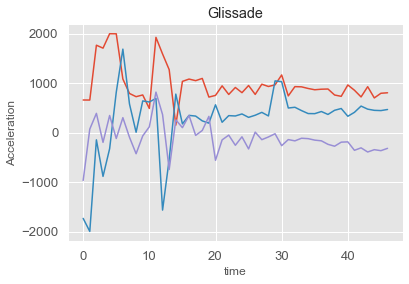

In [20]:
# make PLOTS for  Accel data to visualize (GLISSADE)
from matplotlib import style
style.use("ggplot")

# TO PRINT ALL FILES (uncomment)
#for i in range(len(GA_count)):
#    plt.figure()
#    plt.plot(d_GA[i].Accel_X)
#    plt.plot(d_GA[i].Accel_Y)
#    plt.plot(d_GA[i].Accel_Z)
#    plt.title("Glissade")     # sets the title for the chart
#    plt.xlabel("time")   # sets the label to use for the x-axis
#    plt.ylabel("Acceleration")      # sets the label to use for the y-axis

# print an example plot, first one
plt.figure()
plt.plot(d_GA[0].Accel_X)
plt.plot(d_GA[0].Accel_Y)
plt.plot(d_GA[0].Accel_Z)
plt.title("Glissade")     # sets the title for the chart
plt.xlabel("time")   # sets the label to use for the x-axis
plt.ylabel("Acceleration")      # sets the label to use for the y-axis
    
plt.show()

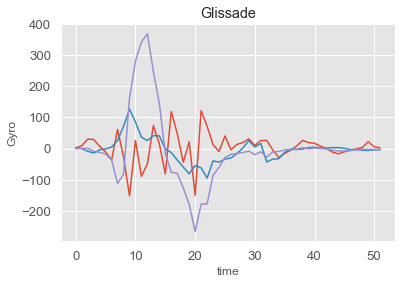

In [22]:
# make PLOTS for Gyro data to visualize (GLISSADE)

# TO PLOT ALL FILES == uncomment
#for i in range(len(GA_count)):
#    plt.figure()
#    plt.plot(d_GG[i].Gyro_X)
#    plt.plot(d_GG[i].Gyro_Y)
#    plt.plot(d_GG[i].Gyro_Z)
#    plt.title("Glissade")     # sets the title for the chart
#    plt.xlabel("time")   # sets the label to use for the x-axis
#    plt.ylabel("Gyro")      # sets the label to use for the y-axis
 

# print an example plot, first one
plt.figure()
plt.plot(d_GG[0].Gyro_X)
plt.plot(d_GG[0].Gyro_Y)
plt.plot(d_GG[0].Gyro_Z)
plt.title("Glissade")     # sets the title for the chart
plt.xlabel("time")   # sets the label to use for the x-axis
plt.ylabel("Gyro")      # sets the label to use for the y-axis

plt.show()

In [ ]:
## plot the Pas-de-chat data

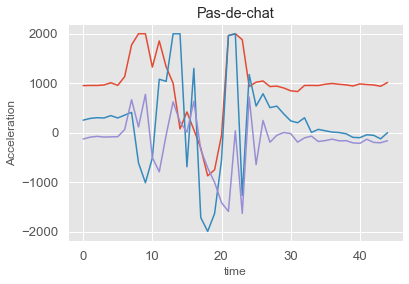

In [23]:
# make PLOTS for Accel data to visualize (PAS-DE-CHAT)

#  TO PLOT ALL FILES -- uncommnet
#for i in range(len(PA_count)):
#    plt.figure()
#    plt.plot(d_PA[i].Accel_X)
#    plt.plot(d_PA[i].Accel_Y)
#    plt.plot(d_PA[i].Accel_Z)
#    plt.title("Pas-de-chat")     # sets the title for the chart
#    plt.xlabel("time")   # sets the label to use for the x-axis
#    plt.ylabel("Acceleration")      # sets the label to use for the y-axis

# print an example plot, first one
plt.figure()
plt.plot(d_PA[0].Accel_X)
plt.plot(d_PA[0].Accel_Y)
plt.plot(d_PA[0].Accel_Z)
plt.title("Pas-de-chat")     # sets the title for the chart
plt.xlabel("time")   # sets the label to use for the x-axis
plt.ylabel("Acceleration")      # sets the label to use for the y-axis
    
plt.show()

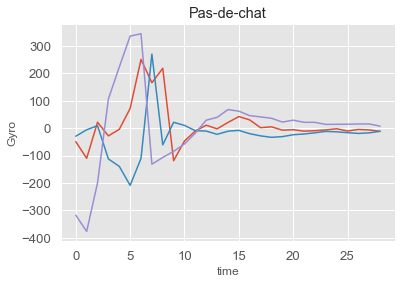

In [24]:
# make PLOTS for Gyro data to visualize (PAS-DE-CHAT)

# TO PLOT ALL DATA -- uncomment
#for i in range(len(PG_count)):
#    plt.figure()
#    plt.plot(d_PG[i].Gyro_X)
#    plt.plot(d_PG[i].Gyro_Y)
#    plt.plot(d_PG[i].Gyro_Z)
#    plt.title("Pas-de-chat")     # sets the title for the chart
#    plt.xlabel("time")   # sets the label to use for the x-axis
#    plt.ylabel("Gyro")      # sets the label to use for the y-axis
    
# print an example plot, first one
plt.figure()
plt.plot(d_PG[0].Gyro_X)
plt.plot(d_PG[0].Gyro_Y)
plt.plot(d_PG[0].Gyro_Z)
plt.title("Pas-de-chat")     # sets the title for the chart
plt.xlabel("time")   # sets the label to use for the x-axis
plt.ylabel("Gyro")      # sets the label to use for the y-axis
    
plt.show()

In [ ]:
## plot the Jette data

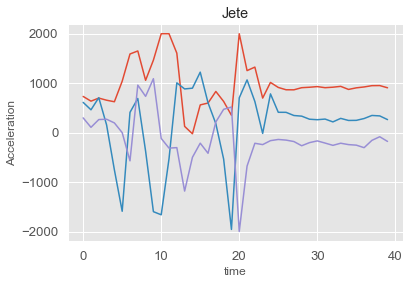

In [25]:
# make PLOTS for Accel data to visualize (Jette)

# TO PLOT ALL DATA -- uncomment
#for i in range(len(JA_count)):
#    plt.figure()
#    plt.plot(d_JA[i].Accel_X)
#    plt.plot(d_JA[i].Accel_Y)
#    plt.plot(d_JA[i].Accel_Z)
#    plt.title("Jette")     # sets the title for the chart
#    plt.xlabel("time")   # sets the label to use for the x-axis
#    plt.ylabel("Acceleration")      # sets the label to use for the y-axis
    
# print an example plot, first one
plt.figure()
plt.plot(d_JA[0].Accel_X)
plt.plot(d_JA[0].Accel_Y)
plt.plot(d_JA[0].Accel_Z)
plt.title("Jete")     # sets the title for the chart
plt.xlabel("time")   # sets the label to use for the x-axis
plt.ylabel("Acceleration")      # sets the label to use for the y-axis
    
plt.show()

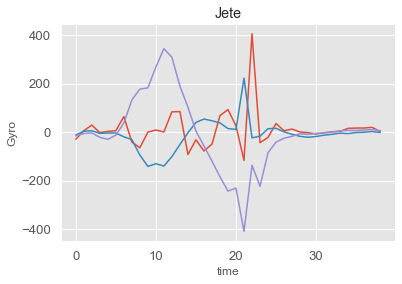

In [26]:
# make PLOTS for Gyro data to visualize (Jete)

# TO PLOT ALL DATA -- uncomment
#for i in range(len(JG_count)):
#    plt.figure()
#    plt.plot(d_JG[i].Gyro_X)
#    plt.plot(d_JG[i].Gyro_Y)
#    plt.plot(d_JG[i].Gyro_Z)
#    plt.title("Jette")     # sets the title for the chart
#    plt.xlabel("time")   # sets the label to use for the x-axis
#    plt.ylabel("Gyro")      # sets the label to use for the y-axis
    
# print an example plot, first one
plt.figure()
plt.plot(d_JG[0].Gyro_X)
plt.plot(d_JG[0].Gyro_Y)
plt.plot(d_JG[0].Gyro_Z)
plt.title("Jete")     # sets the title for the chart
plt.xlabel("time")   # sets the label to use for the x-axis
plt.ylabel("Gyro")      # sets the label to use for the y-axis
    
plt.show()

In [308]:
# CONCAT all the csv files  -- NOT needed

#GAcc_all = {}

#GAcc_all = pd.concat([d_GA[0],d_GA[1],d_GA[2],d_GA[3],d_GA[4],d_GA[5],d_GA[6],d_GA[7],d_GA[8],d_GA[9],d_GA[10],d_GA[11],d_GA[12],d_GA[13],d_GA[14],d_GA[15],d_GA[16],d_GA[17],d_GA[18],d_GA[19],d_GA[20],d_GA[21],d_GA[22],d_GA[23],d_GA[24],d_GA[25],d_GA[26],d_GA[27],d_GA[28],d_GA[29],d_GA[30],d_GA[31],d_GA[32],d_GA[33],d_GA[34],d_GA[35],d_GA[36],d_GA[37],d_GA[38],d_GA[39],d_GA[40]])
#PAcc_all = pd.concat([d_PA[0],d_PA[1],d_PA[2],d_PA[3],d_PA[4],d_PA[5],d_PA[6],d_PA[7],d_PA[8],d_PA[9],d_PA[10],d_PA[11],d_PA[12],d_PA[13],d_PA[14],d_PA[15],d_PA[16],d_PA[17],d_PA[18],d_PA[19],d_PA[20],d_PA[21],d_PA[22],d_PA[23],d_PA[24],d_PA[25],d_PA[26],d_PA[27],d_PA[28],d_PA[29],d_PA[30],d_PA[31],d_PA[32],d_PA[33],d_PA[34],d_PA[35],d_PA[36],d_PA[37],d_PA[38],d_PA[39],d_PA[40]])
#JAcc_all = pd.concat([d_JA[0],d_JA[1],d_JA[2],d_JA[3],d_JA[4],d_JA[5],d_JA[6],d_JA[7],d_JA[8],d_JA[9],d_JA[10],d_JA[11],d_JA[12],d_JA[13],d_JA[14],d_JA[15],d_JA[16],d_JA[17],d_JA[18],d_JA[19],d_JA[20],d_JA[21],d_JA[22],d_JA[23],d_JA[24],d_JA[25],d_JA[26],d_JA[27],d_JA[28],d_JA[29],d_JA[30],d_JA[31],d_JA[32],d_JA[33],d_JA[34],d_JA[35],d_JA[36],d_JA[37],d_JA[38],d_JA[39],d_JA[40]])
   
#d_GA[43].tail()
#GAcc_all.tail()
#GAcc_all.describe()



,Time,Accel_X,Accel_Y,Accel_Z
count,2007.000000,2007.000000,2007.000000,2007.000000
mean,82931.477828,998.719482,216.510214,18.263079
std,20784.521568,375.234779,573.595253,318.127890
min,39217.000000,-1797.000000,-1998.000000,-1993.000000
25%,68307.500000,876.000000,217.500000,-109.000000
50%,85599.000000,922.000000,364.000000,-26.000000
75%,97758.500000,1007.500000,420.000000,100.000000
max,120043.000000,1998.000000,1997.000000,1940.000000


In [309]:
#PAcc_all.describe()


,Time,Accel_X,Accel_Y,Accel_Z
count,1568.000000,1568.000000,1568.000000,1568.000000
mean,160991.605867,812.868622,173.739158,-52.538903
std,20238.739162,829.829175,919.825244,603.366583
min,123990.000000,-1998.000000,-1998.000000,-1997.000000
25%,143527.000000,799.500000,-46.250000,-216.250000
50%,158758.500000,969.000000,118.000000,-95.000000
75%,178866.750000,1039.250000,502.000000,126.250000
max,196247.000000,1998.000000,1997.000000,1998.000000


In [310]:
#JAcc_all.describe()

,Time,Accel_X,Accel_Y,Accel_Z
count,1662.000000,1661.000000,1660.000000,1660.000000
mean,74464.863418,962.194461,216.457831,-15.378916
std,21151.469656,536.490980,718.700378,426.658431
min,-59.000000,-1998.000000,-1998.000000,-1997.000000
25%,62268.500000,798.000000,180.000000,-181.000000
50%,77085.000000,922.000000,346.500000,-47.500000
75%,92463.500000,1034.000000,481.250000,151.250000
max,104486.000000,1998.000000,1997.000000,1992.000000


In [338]:
d_GA[10].describe()

,Time,Accel_X,Accel_Y,Accel_Z
count,42.000000,42.000000,42.000000,42.000000
mean,63763.761905,1004.976190,68.142857,-28.761905
std,76.669328,419.901411,665.141488,364.025449
min,63636.000000,172.000000,-1984.000000,-1453.000000
25%,63699.500000,801.250000,-37.750000,-100.500000
50%,63764.000000,932.000000,277.500000,33.000000
75%,63827.500000,1168.500000,394.000000,142.000000
max,63892.000000,1997.000000,1047.000000,543.000000


In [5]:
# Save the mean and std for the Acceleration data in Z

num_train_sets = 40
features = pd.DataFrame(columns=['Mean_Z','Std_Z','Type'])

for i in range(num_train_sets):
    features = features.append({'Mean_Z': d_GA[i]["Accel_Z"].mean(), 'Std_Z': d_GA[i]["Accel_Z"].std(), 'Type': 'Glissade'}, ignore_index=True)
    features = features.append({'Mean_Z': d_PA[i]["Accel_Z"].mean(), 'Std_Z': d_PA[i]["Accel_Z"].std(), 'Type': 'Pas-de-chat'}, ignore_index=True)
    features = features.append({'Mean_Z': d_JA[i]["Accel_Z"].mean(), 'Std_Z': d_JA[i]["Accel_Z"].std(), 'Type': 'Jete'}, ignore_index=True)


# Save the dataframe in a CSV file
features.to_csv('features.csv', index=False)


In [12]:
#Gliss_Pas_ONLY_features = pd.DataFrame(columns=['Mean_Z','Std_Z','Type'])

#num_train_sets = 40
#for i in range(num_train_sets):
#    Gliss_Pas_ONLY_features = Gliss_Pas_ONLY_features.append({'Mean_Z': d_GA[i]["Accel_Z"].mean(), 'Std_Z': d_GA[i]["Accel_Z"].std(), 'Type': 'Glissade'}, ignore_index=True)
#    Gliss_Pas_ONLY_features = Gliss_Pas_ONLY_features.append({'Mean_Z': d_PA[i]["Accel_Z"].mean(), 'Std_Z': d_PA[i]["Accel_Z"].std(), 'Type': 'Pas-de-chat'}, ignore_index=True)
    

# Save the dataframe in a CSV file
#Gliss_Pas_ONLY_features.to_csv('Gliss_Pas_ONLY_features.csv', index=False)

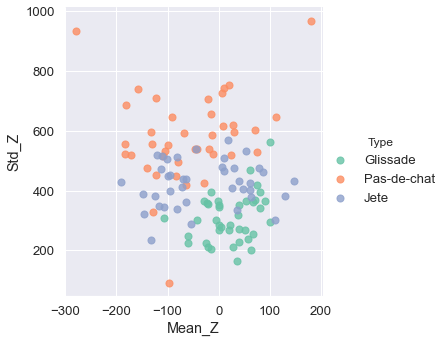

In [6]:
# SVM model
from sklearn import svm
import seaborn as sns; sns.set(font_scale=1.2)

data = pd.read_csv('features.csv')

sns.lmplot('Mean_Z', 'Std_Z',
           data=data,
           hue='Type',
           palette='Set2',
           fit_reg=False,
           scatter_kws={"s": 50});

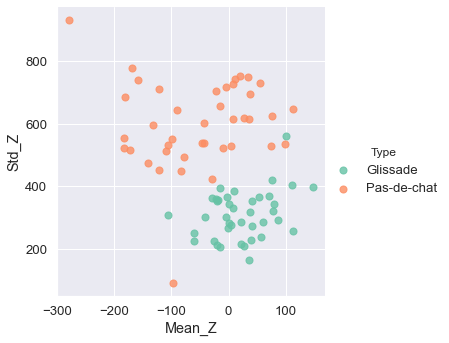

In [412]:
## THIS IS FOR ONLY 2 JUMPS

# SVM model
#from sklearn import svm
#import seaborn as sns; sns.set(font_scale=1.2)

#data2jumps = pd.read_csv('Gliss_Pas_ONLY_features.csv')

#sns.lmplot('Mean_Z', 'Std_Z',
#           data=data2jumps,
#           hue='Type',
#           palette='Set2',
#           fit_reg=False,
#           scatter_kws={"s": 50});

In [413]:
# FOR TWO jumps -- Glissade and Pas-de-chat
#X = data[['Mean_Z','Std_Z']].values
#y = np.where(data['Type']=='Pas-de-chat', 1, 0) #--1 for Pas-de-chat and 0 for Glissade---
#model2jumpsonly = svm.SVC(kernel='linear').fit(X, y)

In [7]:
# FOR THREE jumps now
#C=1
#gamma=0.1

X = data[['Mean_Z','Std_Z']].values
y = np.where(data['Type']=='Pas-de-chat', 1, #--2 for Jete, 1 for Pas-de-chat and 0 for Glissade---
         (np.where(data['Type']=='Glissade', 0 , 2)))
model = svm.SVC(kernel='linear').fit(X, y)
#RBFmodel = svm.SVC(kernel='rbf', gamma='auto', C=C).fit(X, y)
POLYmodel = svm.SVC(kernel='poly', degree=2, C=1, gamma='auto').fit(X, y)

In [30]:
print(data)

         Mean_Z       Std_Z         Type
0   -106.659574  308.793886     Glissade
1   -172.111111  517.760616  Pas-de-chat
2   -120.550000  518.966722         Jete
3     -5.173333  302.986146     Glissade
4   -183.833333  554.577636  Pas-de-chat
..          ...         ...          ...
115  -13.034483  584.375031  Pas-de-chat
116   10.117647  507.359162         Jete
117  100.282609  295.010483     Glissade
118   70.918919  602.223675  Pas-de-chat
119   60.558140  400.748484         Jete

[120 rows x 3 columns]


Text(0.5, 1.0, 'Mean and Std of Z Acceleration')

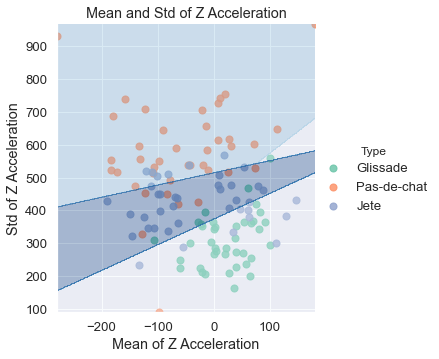

In [8]:
from numpy import c_

# This is for the linear model

sns.lmplot('Mean_Z', 'Std_Z',
           data=data,
           hue='Type',
           palette='Set2',
           fit_reg=False,
           scatter_kws={"s": 50});

#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
#h = abs((x_max / x_min) / 20)
h = abs((x_max / x_min) / 0.4)
#print(h)

#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

#print(x_min,x_max, y_min, y_max, h)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Mean of Z Acceleration')
plt.ylabel('Std of Z Acceleration')
plt.title("Mean and Std of Z Acceleration")
#Figure below shows the points and the classes to which they belong.

In [ ]:
# TRY 3Dplot
from mpl_toolkits.mplot3d import Axes3D


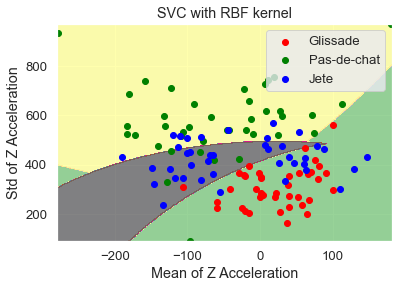

In [9]:
from numpy import c_

# This is for the POLY model


#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
h = abs((x_max / x_min) / 0.4)


#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

#print(x_min,x_max, y_min, y_max, h)
Z = POLYmodel.predict(np.c_[xx.ravel(), yy.ravel()])

#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
#plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.3)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

#---plot the training points---
feature_names = ['Mean_Z', 'Std_Z']
jumps = ['Glissade','Pas-de-chat', 'Jete']
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], jumps):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Mean of Z Acceleration')
plt.ylabel('Std of Z Acceleration')
plt.title("SVC with RBF kernel")
plt.legend(loc='best', shadow=False, scatterpoints=1)
#Figure below shows the points and the classes to which they belong.


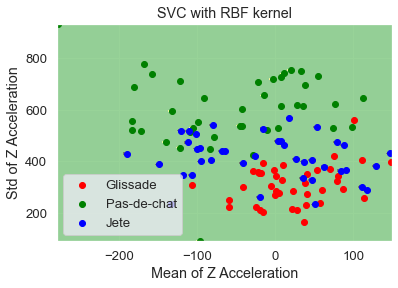

In [529]:
## An extra plot to change parameters

Z = Z.reshape(xx.shape)
#plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.3)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

#---plot the training points---
feature_names = ['Mean_Z', 'Std_Z']
jumps = ['Glissade','Pas-de-chat', 'Jete']
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], jumps):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Mean of Z Acceleration')
plt.ylabel('Std of Z Acceleration')
plt.title("SVC with RBF kernel")
plt.legend(loc='best', shadow=False, scatterpoints=1)

In [34]:
# PREDICTION
def What_Jump_RBF(Mean_Z, Std_Z):
    if(RBFmodel.predict([[Mean_Z, Std_Z]]))==0:
        print('Glissade')
    elif(RBFmodel.predict([[Mean_Z, Std_Z]]))==1:
        print('Pas-de-chat')
    else:
        print('Jete')

In [10]:
# PREDICTION
def What_Jump_POLY(Mean_Z, Std_Z):
    if(POLYmodel.predict([[Mean_Z, Std_Z]]))==0:
        print('Glissade')
    elif(POLYmodel.predict([[Mean_Z, Std_Z]]))==1:
        print('Pas-de-chat')
    else:
        print('Jete')

In [11]:
# PREDICTION
def What_Jump(Mean_Z, Std_Z):
    if(model.predict([[Mean_Z, Std_Z]]))==0:
        print('Glissade')
    elif(model.predict([[Mean_Z, Std_Z]]))==1:
        print('Pas-de-chat')
    else:
        print('Jete')

In [12]:
# Read in Glissade TEST data and check predictions

gtest_dir = 'PROJECT/data/glissade/Accel/test'
# make list of CSV files
gtest_csvs = [x for x in os.listdir(gtest_dir) if x.endswith('.csv')]

# stats.csv -> stats
gtest_count = [os.path.splitext(os.path.basename(x))[0] for x in gtest_csvs]
#print(len(gtest_count))

# Create a dictionary of dataframes for TEST data
dg_test = {}  # TEST Accel data

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(gtest_count)):
        gtest_csvfile = os.path.join(gtest_dir, gtest_csvs[i])
        dg_test[i] = pd.read_csv(gtest_csvfile, skiprows=4, usecols=[3,5,6,7])
        dg_test[i].columns = ['Time', 'Accel_X', 'Accel_Y', 'Accel_Z']

In [26]:
# Read in Glissade TEST data from BD (Beginner dancer) and check predictions

gtestBD_dir = 'PROJECT/data/glissade/Accel/testBD'
# make list of CSV files
gtestBD_csvs = [x for x in os.listdir(gtestBD_dir) if x.endswith('.csv')]

# stats.csv -> stats
gtestBD_count = [os.path.splitext(os.path.basename(x))[0] for x in gtestBD_csvs]
#print(len(gtest_count))

# Create a dictionary of dataframes for TEST data
dg_testBD = {}  # TEST Accel data

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(gtestBD_count)):
        gtestBD_csvfile = os.path.join(gtestBD_dir, gtestBD_csvs[i])
        dg_testBD[i] = pd.read_csv(gtestBD_csvfile, skiprows=4, usecols=[3,5,6,7])
        dg_testBD[i].columns = ['Time', 'Accel_X', 'Accel_Y', 'Accel_Z']

In [14]:
# Get GLISSADE FEATURES (Mean_Z and STD_Z) for TEST data into CSV file 

gtest_features = pd.DataFrame(columns=['Mean_Z','Std_Z'])

for i in range(len(gtest_count)):
    gtest_features = gtest_features.append({'Mean_Z': dg_test[i]["Accel_Z"].mean(), 'Std_Z': dg_test[i]["Accel_Z"].std(), 'Type': 'Glissade'}, ignore_index=True)
    #What_Jump(dg_test[i]["Accel_Z"].mean(), dg_test[i]["Accel_Z"].std())
    

# Save the dataframe in a CSV file
gtest_features.to_csv('gtest_features.csv', index=False)

In [27]:
# Get GLISSADE FEATURES (Mean_Z and STD_Z) for TESTBD data into CSV file 

gtestBD_features = pd.DataFrame(columns=['Mean_Z','Std_Z'])

for i in range(len(gtestBD_count)):
    gtestBD_features = gtestBD_features.append({'Mean_Z': dg_testBD[i]["Accel_Z"].mean(), 'Std_Z': dg_testBD[i]["Accel_Z"].std(), 'Type': 'Glissade'}, ignore_index=True)
    
    

# Save the dataframe in a CSV file
gtestBD_features.to_csv('gtest_features.csv', index=False)

In [66]:
# RESULTS for TEST Glissade using LINEAR model
print('Printing results...')
print('Data: TEST data from dancer who trained the model')
print('Model: LINEAER')
print('Testing jump: Glissade')
for i in range(len(gtest_count)):
    print('Jump', i,':', end=" ")
    What_Jump(dg_test[i]["Accel_Z"].mean(), dg_test[i]["Accel_Z"].std())




Printing results...
Data: TEST data from dancer who trained the model
Model: LINEAER
Testing jump: Glissade
Jump 0 : Glissade
Jump 1 : Glissade
Jump 2 : Glissade
Jump 3 : Glissade
Jump 4 : Glissade
Jump 5 : Glissade
Jump 6 : Glissade
Jump 7 : Jete
Jump 8 : Glissade
Jump 9 : Glissade


In [63]:
# RESULTS for TESTBD Glissade using LINEAR model

print('Printing results...')
print('Data: TEST data from beginner dancer')
print('Model: LINEAER')
print('Testing jump: Glissade')
for i in range(len(gtestBD_count)):
    print('Jump', i,':', end=" ")
    What_Jump(dg_testBD[i]["Accel_Z"].mean(), dg_testBD[i]["Accel_Z"].std())



Printing results...
Data: TEST data from beginner dancer
Model: LINEAER
Testing jump: Glissade
Jump 0 : Jete
Jump 1 : Glissade
Jump 2 : Glissade
Jump 3 : Glissade
Jump 4 : Jete
Jump 5 : Jete
Jump 6 : Glissade
Jump 7 : Jete
Jump 8 : Glissade
Jump 9 : Glissade


In [64]:
# RESULTS for test Glissade using POLY model
print('Printing results...')
print('Data: TEST data from dancer who trained the model')
print('Model: POLY order 2')
print('Testing jump: Glissade')
for i in range(len(gtest_count)):
    print('Jump', i,':', end=" ") 
    What_Jump_POLY(dg_test[i]["Accel_Z"].mean(), dg_test[i]["Accel_Z"].std())

Printing results...
Data: TEST data from dancer who trained the model
Model: POLY order 2
Testing jump: Glissade
Jump 0 : Glissade
Jump 1 : Glissade
Jump 2 : Glissade
Jump 3 : Glissade
Jump 4 : Glissade
Jump 5 : Glissade
Jump 6 : Glissade
Jump 7 : Glissade
Jump 8 : Glissade
Jump 9 : Glissade


In [65]:
# RESULTS for testBD Glissade using POLY model
print('Printing results...')
print('Data: TEST data from beginner dancer')
print('Model: POLY order 2')
print('Testing jump: Glissade')
for i in range(len(gtestBD_count)):
    print('Jump', i,':', end=" ") 
    What_Jump_POLY(dg_testBD[i]["Accel_Z"].mean(), dg_testBD[i]["Accel_Z"].std())

Printing results...
Data: TEST data from beginner dancer
Model: POLY order 2
Testing jump: Glissade
Jump 0 : Glissade
Jump 1 : Glissade
Jump 2 : Glissade
Jump 3 : Glissade
Jump 4 : Jete
Jump 5 : Glissade
Jump 6 : Glissade
Jump 7 : Jete
Jump 8 : Glissade
Jump 9 : Glissade


In [ ]:
# RESULTS for test Glissade using RBF model
#for i in range(len(gtest_count)):
#    What_Jump_RBF(dg_test[i]["Accel_Z"].mean(), dg_test[i]["Accel_Z"].std())
     
#print(gliss_count)
#print("Glissade TEST data acccuracy: ", prediction_accuracy, " %")

In [30]:
# Read in Pas-de-chat TEST data 

ptest_dir = 'PROJECT/data/pas-de-chat/Accel/test'
# make list of CSV files
ptest_csvs = [x for x in os.listdir(ptest_dir) if x.endswith('.csv')]

# stats.csv -> stats
ptest_count = [os.path.splitext(os.path.basename(x))[0] for x in ptest_csvs]
#print(len(ptest_count))

# Create a dictionary of dataframes for TEST data
dp_test = {}  # TEST Accel data

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(ptest_count)):
        ptest_csvfile = os.path.join(ptest_dir, ptest_csvs[i])
        dp_test[i] = pd.read_csv(ptest_csvfile, skiprows=4, usecols=[3,5,6,7])
        dp_test[i].columns = ['Time', 'Accel_X', 'Accel_Y', 'Accel_Z']

In [31]:
# Read in Pas-de-chat TESTBD data 

ptestBD_dir = 'PROJECT/data/pas-de-chat/Accel/testBD'
# make list of CSV files
ptestBD_csvs = [x for x in os.listdir(ptestBD_dir) if x.endswith('.csv')]

# stats.csv -> stats
ptestBD_count = [os.path.splitext(os.path.basename(x))[0] for x in ptestBD_csvs]


# Create a dictionary of dataframes for TEST data
dp_testBD = {}  # TEST Accel data

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(ptestBD_count)):
        ptestBD_csvfile = os.path.join(ptestBD_dir, ptestBD_csvs[i])
        dp_testBD[i] = pd.read_csv(ptestBD_csvfile, skiprows=4, usecols=[3,5,6,7])
        dp_testBD[i].columns = ['Time', 'Accel_X', 'Accel_Y', 'Accel_Z']

In [32]:
# Get Pas-de-chat FEATURES (Mean_Z and STD_Z) for TEST data into CSV file

ptest_features = pd.DataFrame(columns=['Mean_Z','Std_Z'])

for i in range(len(ptest_count)):
    ptest_features = ptest_features.append({'Mean_Z': dp_test[i]["Accel_Z"].mean(), 'Std_Z': dp_test[i]["Accel_Z"].std(), 'Type': 'Pas-de-chat'}, ignore_index=True)
    

# Save the dataframe in a CSV file
ptest_features.to_csv('ptest_features.csv', index=False)

In [33]:
# Get Pas-de-chat FEATURES (Mean_Z and STD_Z) for TESTBD data into CSV file

ptestBD_features = pd.DataFrame(columns=['Mean_Z','Std_Z'])

for i in range(len(ptestBD_count)):
    ptestBD_features = ptestBD_features.append({'Mean_Z': dp_testBD[i]["Accel_Z"].mean(), 'Std_Z': dp_testBD[i]["Accel_Z"].std(), 'Type': 'Pas-de-chat'}, ignore_index=True)
    

# Save the dataframe in a CSV file
ptestBD_features.to_csv('ptestBD_features.csv', index=False)

In [51]:
# RESULTS for test Pas-de-chat using LINEAR model

print('Printing results...')
print('Data: TEST data from dancer who trained the model')
print('Model: LINEAR')
print('Testing jump: Pas-de-chat')
for i in range(len(ptest_count)):
    print('Jump', i,':', end=" ") 
    What_Jump(dp_test[i]["Accel_Z"].mean(), dp_test[i]["Accel_Z"].std())

Printing results...
Data: TEST data from dancer who trained the model
Model: LINEAR
Testing jump: Pas-de-chat
Jump 0 : Pas-de-chat
Jump 1 : Pas-de-chat
Jump 2 : Pas-de-chat
Jump 3 : Jete
Jump 4 : Pas-de-chat
Jump 5 : Pas-de-chat
Jump 6 : Pas-de-chat
Jump 7 : Pas-de-chat
Jump 8 : Pas-de-chat
Jump 9 : Pas-de-chat


In [52]:
# RESULTS for testBD Pas-de-chat using LINEAR model

print('Printing results...')
print('Data: TEST data from beginner skilled dancer')
print('Model: LINEAR')
print('Testing jump: Pas-de-chat')
for i in range(len(ptestBD_count)):
    print('Jump', i,':', end=" ") 
    What_Jump(dp_testBD[i]["Accel_Z"].mean(), dp_testBD[i]["Accel_Z"].std())

Printing results...
Data: TEST data from beginner skilled dancer
Model: LINEAR
Testing jump: Pas-de-chat
Jump 0 : Pas-de-chat
Jump 1 : Jete
Jump 2 : Pas-de-chat
Jump 3 : Pas-de-chat
Jump 4 : Glissade
Jump 5 : Jete
Jump 6 : Jete
Jump 7 : Jete
Jump 8 : Jete
Jump 9 : Jete


In [53]:
# RESULTS for test Pas-de-chat using POLY model

print('Printing results...')
print('Data: TEST data from dancer who trained the model')
print('Model: POLY order 2')
print('Testing jump: Pas-de-chat')
for i in range(len(ptest_count)):
    print('Jump', i,':', end=" ") 
    What_Jump_POLY(dp_test[i]["Accel_Z"].mean(), dp_test[i]["Accel_Z"].std())

Printing results...
Data: TEST data from dancer who trained the model
Model: POLY order 2
Testing jump: Pas-de-chat
Jump 0 : Pas-de-chat
Jump 1 : Pas-de-chat
Jump 2 : Pas-de-chat
Jump 3 : Glissade
Jump 4 : Pas-de-chat
Jump 5 : Pas-de-chat
Jump 6 : Pas-de-chat
Jump 7 : Pas-de-chat
Jump 8 : Pas-de-chat
Jump 9 : Pas-de-chat


In [54]:
# RESULTS for testBD Pas-de-chat using POLY model

print('Printing results...')
print('Data: TEST data from beginner skilled dancer')
print('Model: POLY order 2# RESULTS for test Pas-de-chat using RBF model
#for i in range(len(ptest_count)):
#    What_Jump_RBF(dp_test[i]["Accel_Z"].mean(), dp_test[i]["Accel_Z"].std())')
print('Testing jump: Pas-de-chat')
for i in range(len(ptestBD_count)):
    print('Jump', i,':', end=" ")   
    What_Jump_POLY(dp_testBD[i]["Accel_Z"].mean(), dp_testBD[i]["Accel_Z"].std())

Printing results...
Data: TEST data from beginner skilled dancer
Model: POLY order 2
Testing jump: Pas-de-chat
Jump 0 : Pas-de-chat
Jump 1 : Jete
Jump 2 : Pas-de-chat
Jump 3 : Pas-de-chat
Jump 4 : Glissade
Jump 5 : Jete
Jump 6 : Jete
Jump 7 : Jete
Jump 8 : Jete
Jump 9 : Jete


In [ ]:
# RESULTS for test Pas-de-chat using RBF model
#for i in range(len(ptest_count)):
#    What_Jump_RBF(dp_test[i]["Accel_Z"].mean(), dp_test[i]["Accel_Z"].std())

In [38]:
# Read in Jete TEST data and check predictions

jtest_dir = 'PROJECT/data/jette/Accel/test'
# make list of CSV files
jtest_csvs = [x for x in os.listdir(jtest_dir) if x.endswith('.csv')]

# stats.csv -> stats
jtest_count = [os.path.splitext(os.path.basename(x))[0] for x in jtest_csvs]
#print(len(jtest_count))

# Create a dictionary of dataframes for TEST data
dj_test = {}  # TEST Accel data

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(jtest_count)):
        jtest_csvfile = os.path.join(jtest_dir, jtest_csvs[i])
        dj_test[i] = pd.read_csv(jtest_csvfile, skiprows=4, usecols=[3,5,6,7])
        dj_test[i].columns = ['Time', 'Accel_X', 'Accel_Y', 'Accel_Z']

In [39]:
# Read in Jete TESTBD data and check predictions

jtestBD_dir = 'PROJECT/data/jette/Accel/testBD'
# make list of CSV files
jtestBD_csvs = [x for x in os.listdir(jtestBD_dir) if x.endswith('.csv')]

# stats.csv -> stats
jtestBD_count = [os.path.splitext(os.path.basename(x))[0] for x in jtestBD_csvs]


# Create a dictionary of dataframes for TEST data
dj_testBD = {}  # TEST Accel data

# READ IN CSV files to the dataframe dictionary
# only  reading the necessary columns and rename them 
for i in range(len(jtestBD_count)):
        jtestBD_csvfile = os.path.join(jtestBD_dir, jtestBD_csvs[i])
        dj_testBD[i] = pd.read_csv(jtestBD_csvfile, skiprows=4, usecols=[3,5,6,7])
        dj_testBD[i].columns = ['Time', 'Accel_X', 'Accel_Y', 'Accel_Z']

In [40]:
# Get Jete FEATURES (Mean_Z and STD_Z) for TEST data into CSV file

jtest_features = pd.DataFrame(columns=['Mean_Z','Std_Z'])

for i in range(len(jtest_count)):
    jtest_features = jtest_features.append({'Mean_Z': dj_test[i]["Accel_Z"].mean(), 'Std_Z': dj_test[i]["Accel_Z"].std(), 'Type': 'Jete'}, ignore_index=True)
    

# Save the dataframe in a CSV file
jtest_features.to_csv('jtest_features.csv', index=False)

In [41]:
# Get Jete FEATURES (Mean_Z and STD_Z) for TESTBD data into CSV file

jtestBD_features = pd.DataFrame(columns=['Mean_Z','Std_Z'])

for i in range(len(jtestBD_count)):
    jtestBD_features = jtestBD_features.append({'Mean_Z': dj_testBD[i]["Accel_Z"].mean(), 'Std_Z': dj_testBD[i]["Accel_Z"].std(), 'Type': 'Jete'}, ignore_index=True)
    

# Save the dataframe in a CSV file
jtestBD_features.to_csv('jtestBD_features.csv', index=False)

In [55]:
# RESULTS for TEST Jete using LINEAR model
print('Printing results...')
print('Data: TEST data from dancer who trained the model')
print('Model: LINEAR')
print('Testing jump: Jete')
for i in range(len(jtest_count)):
    print('Jump', i,':', end=" ")
    What_Jump(dj_test[i]["Accel_Z"].mean(), dj_test[i]["Accel_Z"].std())

Printing results...
Data: TEST data from dancer who trained the model
Model: LINEAR
Testing jump: Jete
Jump 0 : Jete
Jump 1 : Glissade
Jump 2 : Jete
Jump 3 : Glissade
Jump 4 : Pas-de-chat
Jump 5 : Jete
Jump 6 : Pas-de-chat
Jump 7 : Glissade
Jump 8 : Glissade
Jump 9 : Glissade
Jump 10 : Jete
Jump 11 : Glissade
Jump 12 : Glissade


In [56]:

# RESULTS for TESTBD Jete using LINEAR model
print('Printing results...')
print('Data: TEST data from beginner skilled dancer')
print('Model: LINEAR')
print('Testing jump: Jete')
for i in range(len(jtestBD_count)):
    print('Jump', i,':', end=" ")
    What_Jump(dj_testBD[i]["Accel_Z"].mean(), dj_testBD[i]["Accel_Z"].std())

Printing results...
Data: TEST data from beginner skilled dancer
Model: LINEAR
Testing jump: Jete
Jump 0 : Jete
Jump 1 : Jete
Jump 2 : Jete
Jump 3 : Jete
Jump 4 : Jete
Jump 5 : Jete
Jump 6 : Jete
Jump 7 : Pas-de-chat
Jump 8 : Jete
Jump 9 : Glissade
Jump 10 : Jete


In [57]:
# RESULTS for test Jete using POLY model
print('Printing results...')
print('Data: TEST data from dancer who trained the model')
print('Model: POLY order 2')
print('Testing jump: Jete')
for i in range(len(jtest_count)):
    print('Jump', i,':', end=" ")
    What_Jump_POLY(dj_test[i]["Accel_Z"].mean(), dj_test[i]["Accel_Z"].std())

Printing results...
Data: TEST data from dancer who trained the model
Model: POLY order 2
Testing jump: Jete
Jump 0 : Jete
Jump 1 : Glissade
Jump 2 : Jete
Jump 3 : Glissade
Jump 4 : Pas-de-chat
Jump 5 : Jete
Jump 6 : Pas-de-chat
Jump 7 : Glissade
Jump 8 : Glissade
Jump 9 : Glissade
Jump 10 : Jete
Jump 11 : Glissade
Jump 12 : Glissade


In [58]:
# RESULTS for test Jete using POLY model
print('Printing results...')
print('Data: TEST data from beginner dancer')
print('Model: POLY order 2')
print('Testing jump: Jete')
for i in range(len(jtestBD_count)):
    print('Jump', i,':', end=" ")
    What_Jump_POLY(dj_testBD[i]["Accel_Z"].mean(), dj_testBD[i]["Accel_Z"].std())

Printing results...
Data: TEST data from beginner dancer
Model: POLY order 2
Testing jump: Jete
Jump 0 : Jete
Jump 1 : Jete
Jump 2 : Glissade
Jump 3 : Pas-de-chat
Jump 4 : Pas-de-chat
Jump 5 : Jete
Jump 6 : Jete
Jump 7 : Pas-de-chat
Jump 8 : Jete
Jump 9 : Glissade
Jump 10 : Jete


In [ ]:
# RESULTS for test Jete using RBF model
#for i in range(len(jtest_count)):
#    What_Jump_RBF(dj_test[i]["Accel_Z"].mean(), dj_test[i]["Accel_Z"].std())

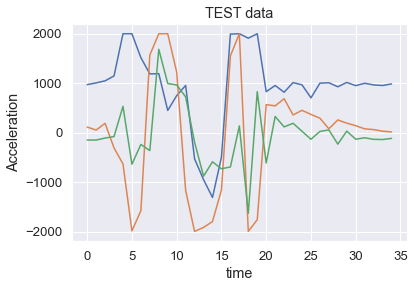

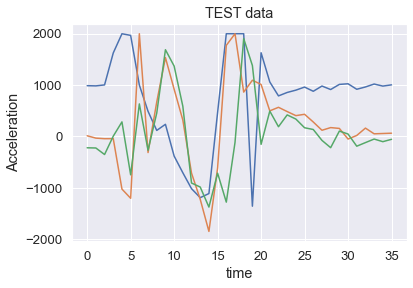

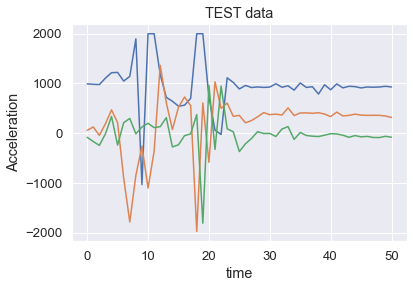

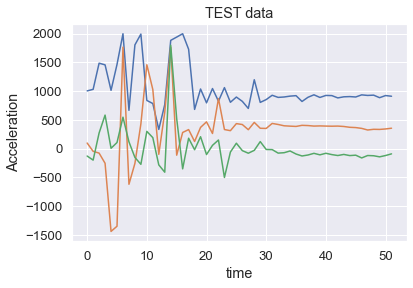

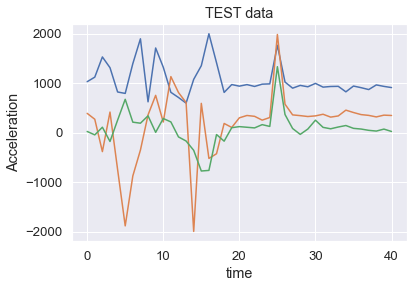

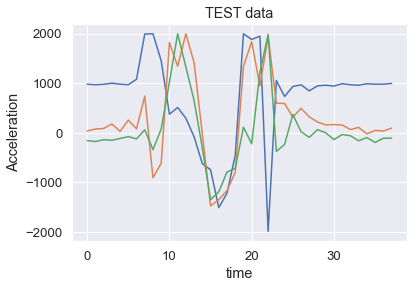

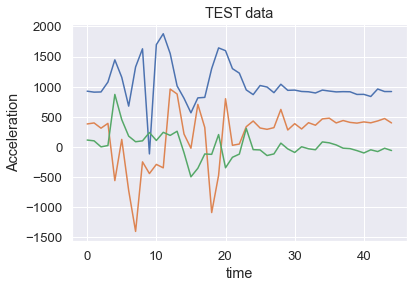

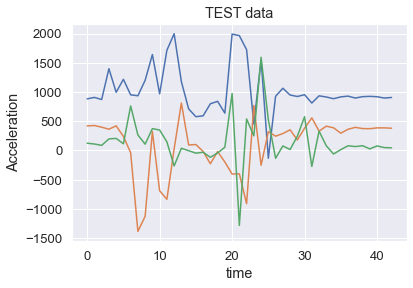

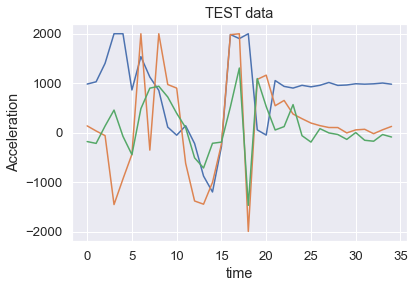

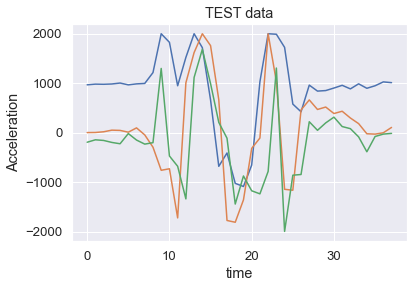

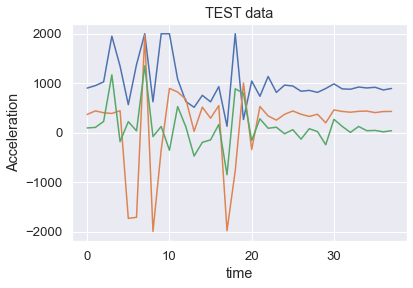

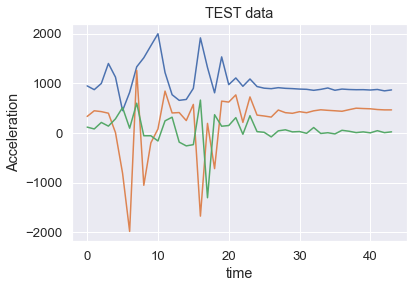

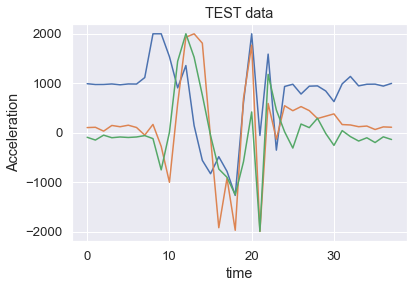

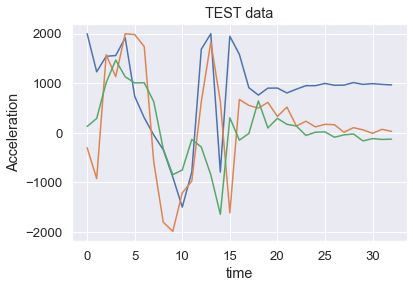

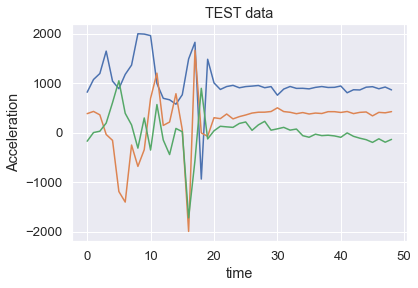

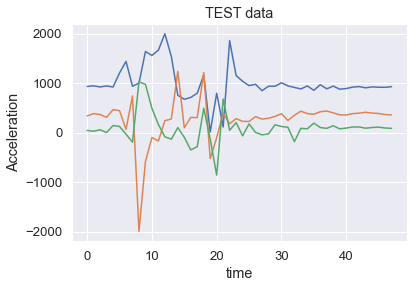

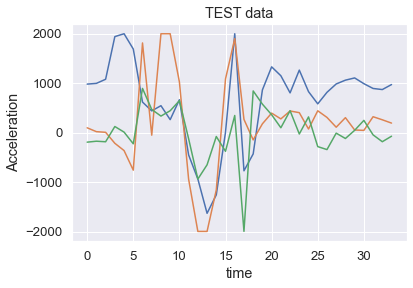

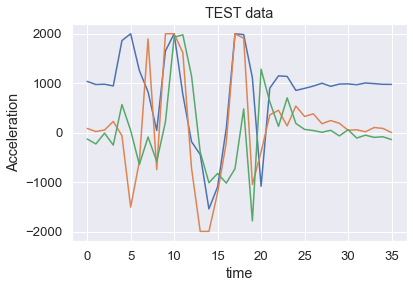

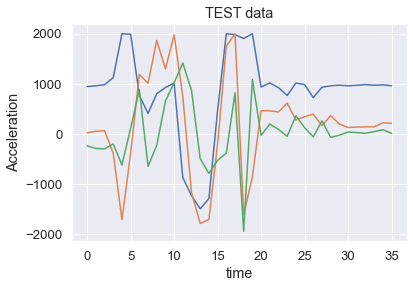

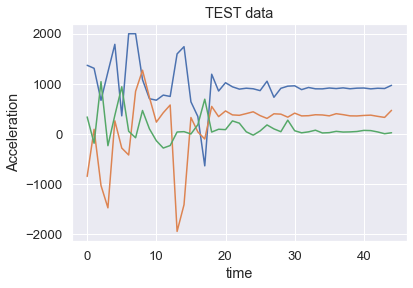

In [449]:
# PLOT Test data

#for i in range(len(test_count)):
#    plt.figure()
#    plt.plot(d_test[i].Accel_X)
#    plt.plot(d_test[i].Accel_Y)
#    plt.plot(d_test[i].Accel_Z)
#    plt.title("TEST data")     # sets the title for the chart
#    plt.xlabel("time")   # sets the label to use for the x-axis
#    plt.ylabel("Acceleration")      # sets the label to use for the y-axis
    
#plt.show()